# Zillow Data Time Series Analysis

### Contributors: 
   - Victorine Imbuhila
   - Titus Mutuku 
   - Mary Gaceri
   - Sammy Kimani
   - Winnie Mauti 
   - Mwenda James

## Overview

Real estate encompasses land, buildings, and physical properties, with applications in residential, commercial, industrial, and agricultural sectors. It plays a pivotal role in the global economy, contributing significantly to the Gross Domestic Product (GDP).

Real Estate in the USA: With a population exceeding 330 million, the US real estate industry holds substantial economic importance, constituting around 6% of the GDP. The sector includes residential and commercial real estate, real estate development, property management, and real estate investment trusts (REITs).

This time series forecasting project is tailored to meet the specific needs of Zamara real estate investment firm. The primary objective is to empower your investment decisions by predicting future trends in real estate prices across various zip codes.


**Challenges in Real Estate Investment:** Numerous factors impact the real estate market, such as government policies, demographics, affordability, housing access disparities, location, and economic conditions. We as consultants aim to address these challenges by developing a predictive time series model to identify the top five zip codes for investment.

## Problem Statement
Real estate, a major component of individuals' wealth, faces complexities driven by various variables. We seek to streamline investment decisions by creating a predictive time series model. The primary goal is to recommend the top five zip codes for investment, considering factors like government policies, demographics, affordability, housing access, location, cash flows, and economic climate.

## Objectives
**Main Objective:** Develop a time series model predicting the top five zip codes for real estate investment.

**Specific Objectives:**
1. Identify and understand seasonal patterns influencing real estate prices in different zip codes
2. Evaluate which city exhibits the most promising real estate investment opportunities
3. Forecast property values over the short and long term, aiming to identify the most favourable zip codes for investment

## Metric of Success
The model's success will be measured by achieving a Root Mean Squared Error (RMSE) of less than 5%, coupled with the identification of the zip codes yielding the highest Return on Investment (ROI).


In [1]:
#Importing necessary Packages
import warnings
import itertools
import numpy as np
import pandas as pd
# import statsmodels.api as sm
from collections import Counter
import folium
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
%matplotlib inline

#Custom Helper Function to melt Time Series Data
# import tools.helpers as th

# df Understanding

The dataset is sourced from Zillow Research, a reputable and widely used platform for real estate market data. The dataset is stored in the file zillow_data.csv within the project repository.


In [2]:
#Loading our dataset
zillow_data = pd.read_csv('data/zillow_data.csv')
zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


The Zillow dataset provides detailed real estate data, with each row representing a unique zip code. Here's an overview of the dataset structure:

- RegionID: A unique identifier for each region.
- RegionName: The zip code for the region.
- City: The city where the region is located.
- State: The state where the region is located.
- Metro: The metropolitan area associated with the region.
- CountyName: The name of the county where the region is located.
- SizeRank: A ranking of the region based on size.
- Monthly Price Data: Starting from April 1996 to April 2018, this dataset includes monthly real estate prices for each zip code.

In [3]:
def get_data_understanding(dataframe):
  """_summary_

  Args:
      dataframe (_type_): _description_

  Returns:
      _type_: The basic information on the dataset
  """
    # Basic information about the DataFrame
  info = dataframe.info()

    # Descriptive statistics for numeric columns
  description = dataframe.describe()
  
  #Checking the shape
  shape = dataframe.shape
    # Checking for missing values in each column
  missing_values = dataframe.isnull().sum()

  return info, description,shape, missing_values


# Now you can call this function with your DataFrame
info, description,shape, missing_values = get_data_understanding(zillow_data)

# If you want to print the results
print("DataFrame Information:")
print(info)
print("\nDescriptive Statistics:")
print(description)
print("\nShape of the Dataset:")
print(shape)
print("\nMissing Values:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
DataFrame Information:
None

Descriptive Statistics:
            RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       19

## Data Preparation

Inorder to prapare our data for modelling we :

- Reshape the data from wide to long format
- Coverting the data types
- Check for missing values and handle them
- Identifying and handling outliers in the dataset
- Feature Engineering

In [4]:
# Data reshaping
# Melting the DataFrame from wide to long format
df = pd.melt(
    zillow_data,
    id_vars=['RegionID', 'RegionName', 'City',
             'State', 'Metro', 'CountyName', 'SizeRank'],
    var_name='Date',
    value_name='Price'
)

# rename RegionID to zipcode
df = df.rename(columns={'RegionName': 'Zipcode'})

# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

df = df.sort_values(by=['Date'])
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
9809,63186,13624,Clayton,NY,Watertown,Jefferson,9810,1996-04-01,56400.0
9810,77596,45335,Jamestown,OH,Dayton,Greene,9811,1996-04-01,NaN
9811,60795,7755,Ocean,NJ,New York,Monmouth,9812,1996-04-01,163700.0
9812,74415,37681,Limestone,TN,Johnson City,Washington,9813,1996-04-01,47200.0


In [5]:
# Now you can call this function with your DataFrame
info, description,shape, missing_values = get_data_understanding(df)

# If you want to print the results
print("\nMissing Values:")
print(missing_values)
print(description)

<class 'pandas.core.frame.DataFrame'>
Index: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   Zipcode     int64         
 2   City        object        
 3   State       object        
 4   Metro       object        
 5   CountyName  object        
 6   SizeRank    int64         
 7   Date        datetime64[ns]
 8   Price       float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 297.7+ MB



Missing Values:
RegionID           0
Zipcode            0
City               0
State              0
Metro         276395
CountyName         0
SizeRank           0
Date               0
Price         156891
dtype: int64
           RegionID       Zipcode      SizeRank  \
count  3.901595e+06  3.901595e+06  3.901595e+06   
mean   8.107501e+04  4.822235e+04  7.362000e+03   
min    5.819600e+04  1.001000e+03  1.000000e+00   
25%    6.717400e+04  2.210100e+04  3.681000e+03   
50%    7.800700e+04  4.610600e+04  7.362000e+03   
75%    9.092100e+04  7.520600e+04  1.104300e+04   
max    7.538440e+05  9.990100e+04  1.472300e+04   
std    3.193304e+04  2.935833e+04  4.250165e+03   

                                Date         Price  
count                        3901595  3.744704e+06  
mean   2007-04-01 18:12:13.584906496  2.076064e+05  
min              1996-04-01 00:00:00  1.130000e+04  
25%              2001-10-01 00:00:00  9.790000e+04  
50%              2007-04-01 00:00:00  1.476000e+05  
75%

The metro column will be filled with missing and then the price values will be handled using linear interpolation

In [6]:
# filling missing values
df['Metro'].fillna('Missing', inplace = True)

# Handling missing values in the 'Price' column
# We'll use linear interpolation as it's a common method for time-series data
df['Price'] = df['Price'].interpolate(
    method='linear')


In [7]:
#checking if there are any more missing  values 
info, description, shape, missing_values = get_data_understanding(df)
print("\nMissing Values:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
Index: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   Zipcode     int64         
 2   City        object        
 3   State       object        
 4   Metro       object        
 5   CountyName  object        
 6   SizeRank    int64         
 7   Date        datetime64[ns]
 8   Price       float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 297.7+ MB

Missing Values:
RegionID      0
Zipcode       0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
Date          0
Price         0
dtype: int64


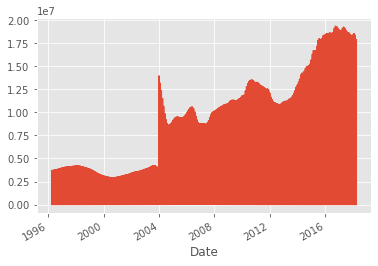

In [8]:
# Assuming 'df' is your DataFrame and 'Date' is your date column
df.set_index('Date')['Price'].plot()
plt.show()

There are no visible outliers in the dataset. It is as a result of the housing bubble in 2004 but this will not be included as an outlier since the impact was distributed in between the years.


### Exploratory Data Analysis

#### Univariate Analysis
What are the top 10 most popular Counties?

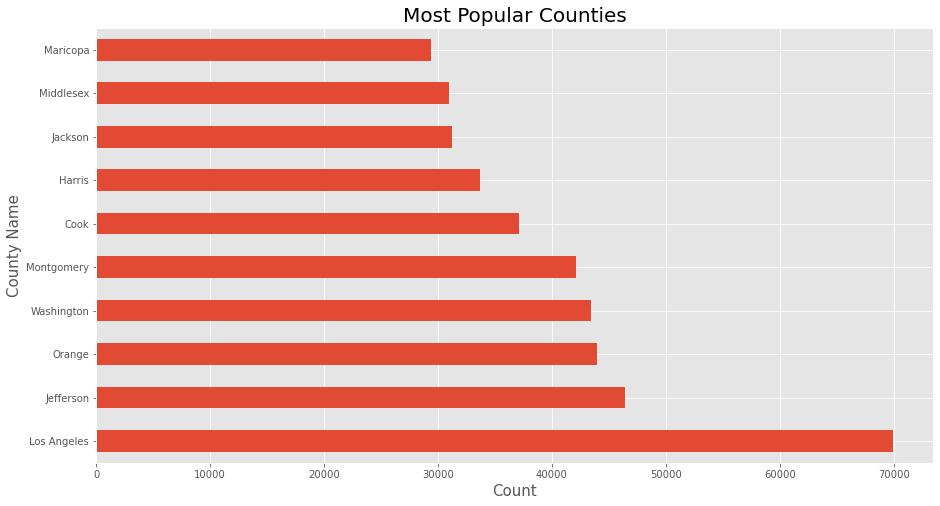

In [9]:
# # plotting the most popular counties in the dataset
plt.figure(figsize=(15, 8))
df.CountyName.value_counts()[:10].plot(kind="barh")
plt.xlabel("Count", fontsize=15)
plt.ylabel("County Name", fontsize=15)
plt.title("Most Popular Counties", fontsize=20);

Los Angeles is the most popular County in the dataset.

What are the top 10 Most popular States?

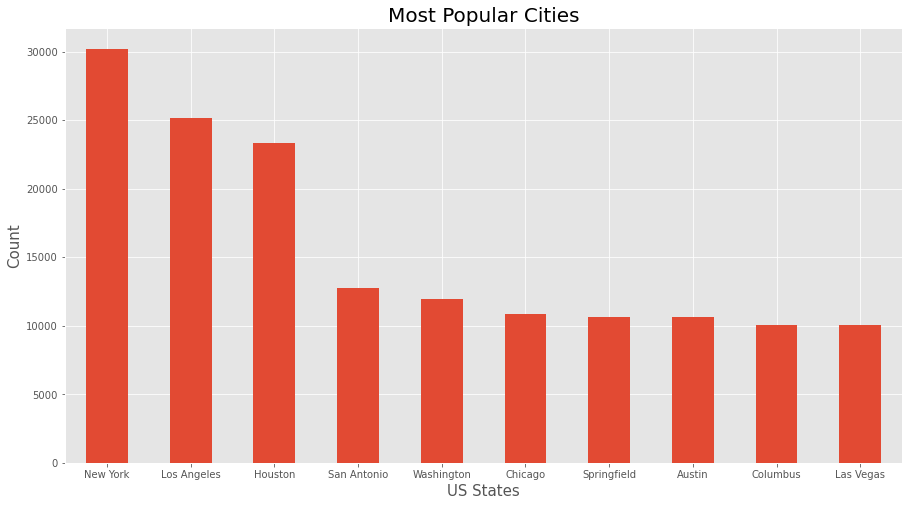

In [10]:
# plotting the most popular states in the dataset
plt.figure(figsize=(15, 8))
df.City.value_counts()[:10].plot(kind="bar")
plt.xlabel("US States", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=0)
plt.title("Most Popular Cities", fontsize=20);

New York is the most popular city followed by Los Angeles.

#### Bivariate Analysis
What is the change in house prices from 1996 to 2018?

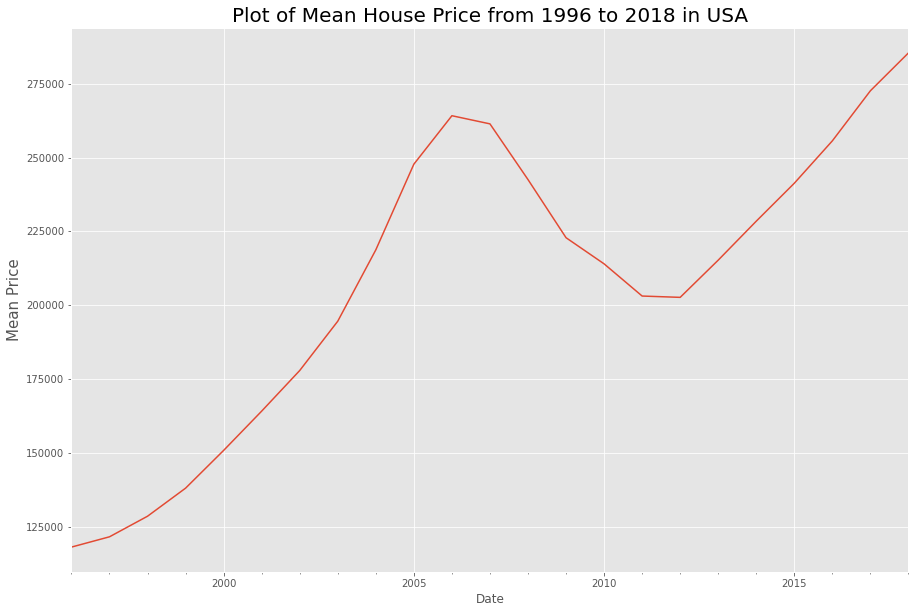

In [11]:
# creating a data series to check the prices of houses over time
ts = df.copy()
ts.set_index("Date", inplace=True)
ts = ts["Price"]

# plotting mean house price
plt.figure(figsize=(15, 10))
ts.resample("A").mean().plot()
plt.ylabel("Mean Price", fontsize=15)
plt.title("Plot of Mean House Price from 1996 to 2018 in USA", fontsize=20);

This shows that the house price had been trending upwards from 1996-2008 until the house market crash where the house prices drastically went down and stabilised around 2012. After this the house price has been trending upwards once again till 2018.

In [12]:
def top_counties_by_price_increment(data, price_col='Price', zipcode_col='CountyName', top_n=5):
    """
    Function to find the top N counties with the highest price increment.

    :param data: DataFrame containing the real estate data.
    :param price_col: Name of the column containing price data.
    :param zipcode_col: Name of the column containing zipcode data.
    :param top_n: Number of top zipcodes to return based on price increment.
    :return: DataFrame containing the top N zipcodes and their price increments.
    """
    # Calculate price increment for each zipcode
    price_increment = data.groupby(zipcode_col).apply(
        lambda x: x[price_col].iloc[-1] - x[price_col].iloc[0])

    # Sort zipcodes by price increment and select top N
    top_zipcodes = price_increment.sort_values(ascending=False).head(top_n)

    return top_zipcodes


top_5_counties = top_counties_by_price_increment(df)

top_5_counties

CountyName
San Diego    1829400.0
Pitkin       1460500.0
Dukes        1402700.0
Nantucket    1331800.0
Alameda      1003300.0
dtype: float64

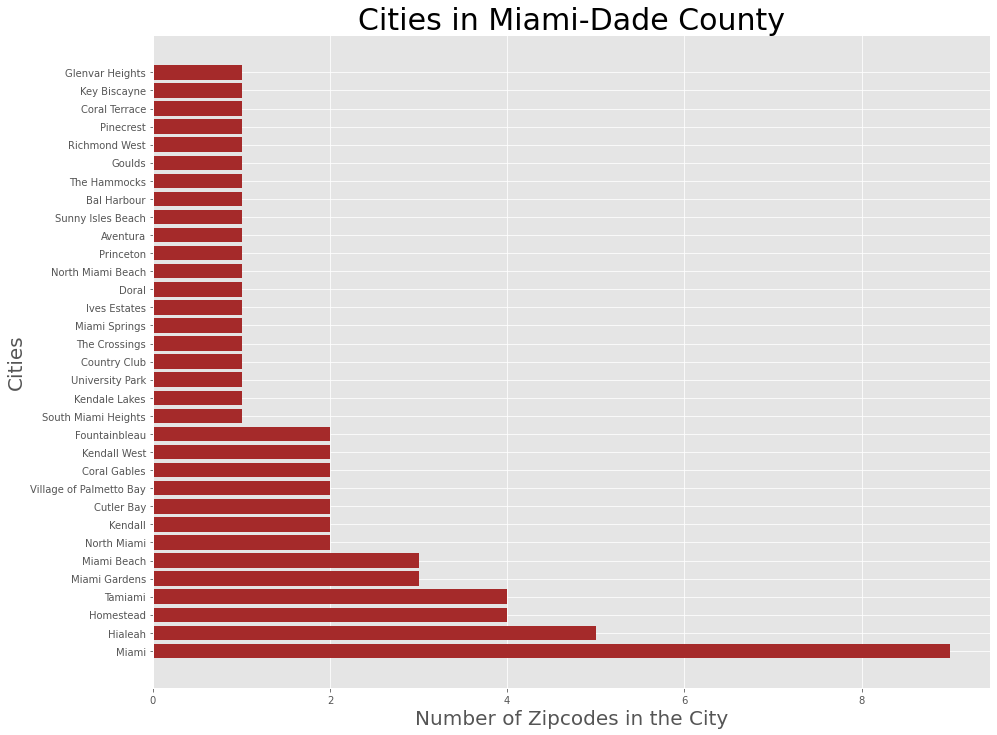

In [6]:
#Visualizing the value counts of zipcodes in each city in the Miami-Dade county

fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in miami_dade['City'].value_counts()]

x = [a for a in miami_dade['City'].value_counts().keys()]

ax.barh(x,y,color='brown')
ax.set_title('Cities in Miami-Dade County',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of Zipcodes in the City',fontsize=20);

We can see above that the city of Miami is divided into the highest number of zipcodes.

Now that we have some understanding of our how the Miami-Dade county is divided, we can now narrow our focus based on our client's requirement.

# Data Preparation

## Filtering for Client's Budget Limit

Since our client has a budget of under 300,000 Dollars we only want to look at zipcodes that fall underneath that price ceiling.

In [7]:
#miami_budget is a dataframe of Miami-Dade County with zipcodes having an average price under $300000 as of April, 2018.
miami_budget = miami_dade[miami_dade['2018-04']<=300000]

In [8]:
#List of Zip Codes in the Miami-Fort Lauderdale metro region within client's budget.
miami_budget_zips = [a for a in miami_budget['RegionName']]

We have filtered Miami-Dade to only include zipcodes having under $300000 in average home value. Let's now take a look at how many cities and zipcodes we are left with.

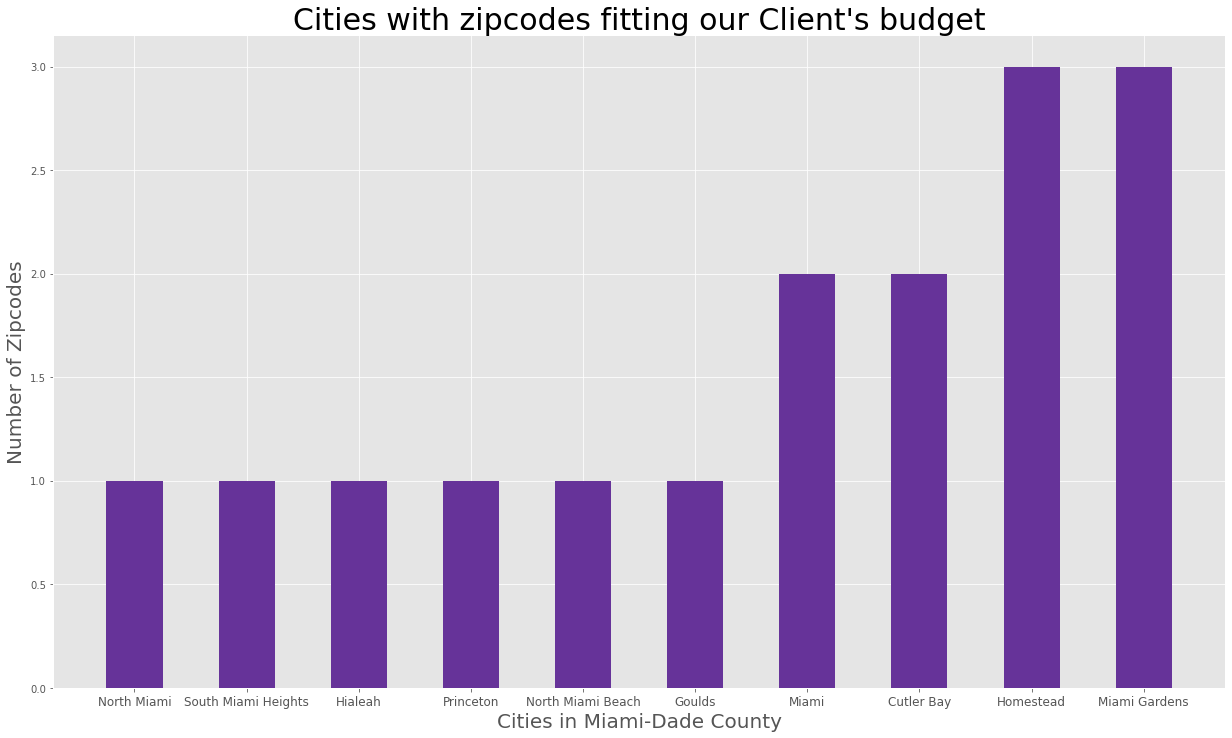

In [9]:
#Pulling necessary data from the dataframe for the bar chart

#Getting City Names
city_names = []

for zipcode in miami_budget_zips:
    city_names.append(miami_budget[miami_budget['RegionName']==zipcode].iloc[0]['City'])

#Retrieving number of zipcodes for each city and feeding it to count_dict
count_dict = {}
for a in Counter(city_names).keys():
    count_dict[a] = Counter(city_names)[a]

#sorting dictionary into ascending order
count_dict = dict(sorted(count_dict.items(), key=lambda item: item[1]))

#Building the bar chart
fig,ax = plt.subplots(figsize=(21,12))

x_labels = [a for a in count_dict.keys()]
x = list(range(1,len(x_labels)+1))
y = [a for a in count_dict.values()]

ax.bar(x,y,color='rebeccapurple',width=0.5)

ax.set_xticks(x)
ax.set_xticklabels(x_labels,fontsize='12')
ax.set_title("Cities with zipcodes fitting our Client's budget",fontsize='30')
ax.set_ylabel("Number of Zipcodes",fontsize='20')
ax.set_xlabel("Cities in Miami-Dade County",fontsize='20');

This chart above gives us useful information about what areas are available for our client under their budget constraints.

## Visualizing the Price history of filtered Zip Codes since 1996

The Visualization below is only for zipcodes that we have filtered under our price limit. Naturally, as a result of this filter we expect all these zipcodes' lates price values to be below $300000.

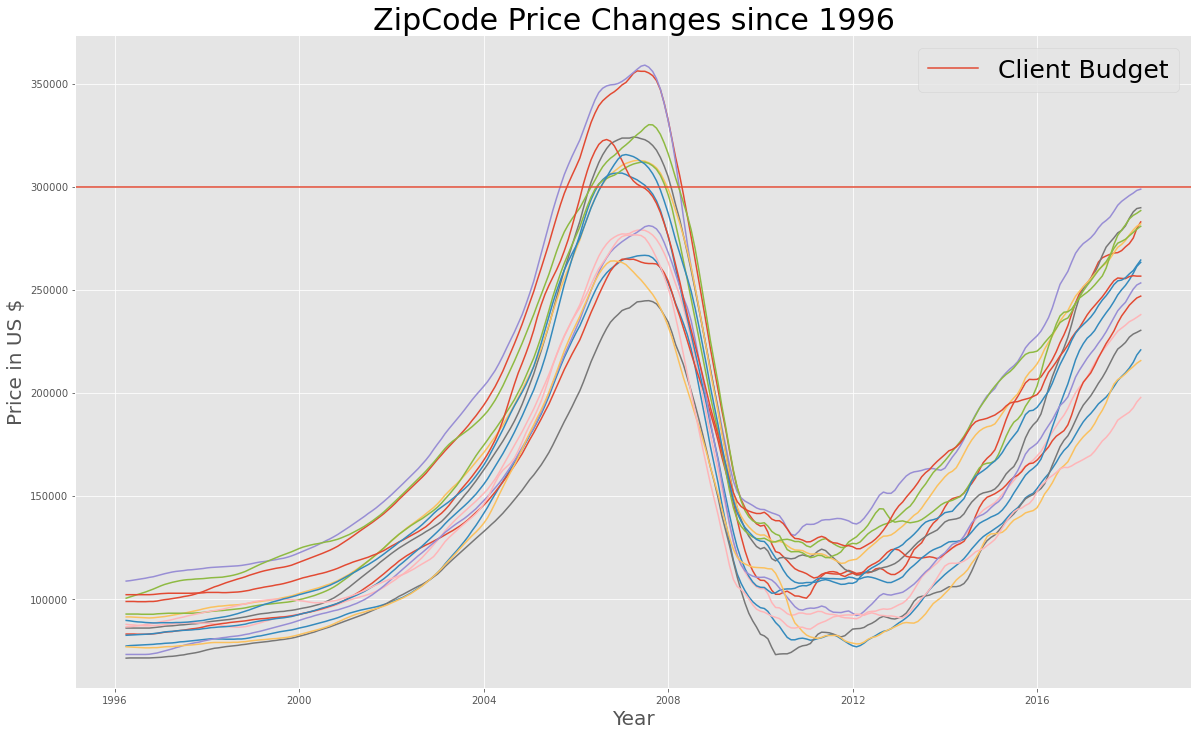

In [10]:
zip_dict = {}

for zipcode in miami_budget_zips:
    zip_dict[zipcode] = th.melt_data(miami_budget[miami_budget['RegionName']==zipcode])

fig,ax = plt.subplots(figsize=(20,12))

for zipcode in zip_dict:
    ax.plot(zip_dict[zipcode],)

ax.axhline(y=300000,label = 'Client Budget')   

ax.set_title('ZipCode Price Changes since 1996',fontsize=30)
ax.set_ylabel('Price in US $',fontsize=20)
ax.set_xlabel('Year',fontsize=20)
ax.legend(prop={'size': 25});

Prices seem to have peaked before the 2008 recession, only to see a dramatic fall immediately after. Since then, prices have been steadily on the rise since 2011 but have yet to reach their pre-recession peaks.

## Visualizing the The Zip Codes' Average Price Growth since 2011

We saw above that prices have started to pick up after the recession; but we want to see more clearly which zipcode areas have been growing the fastest since. Below we can look at a graph that shows us the zipcodes by order of highest growth.

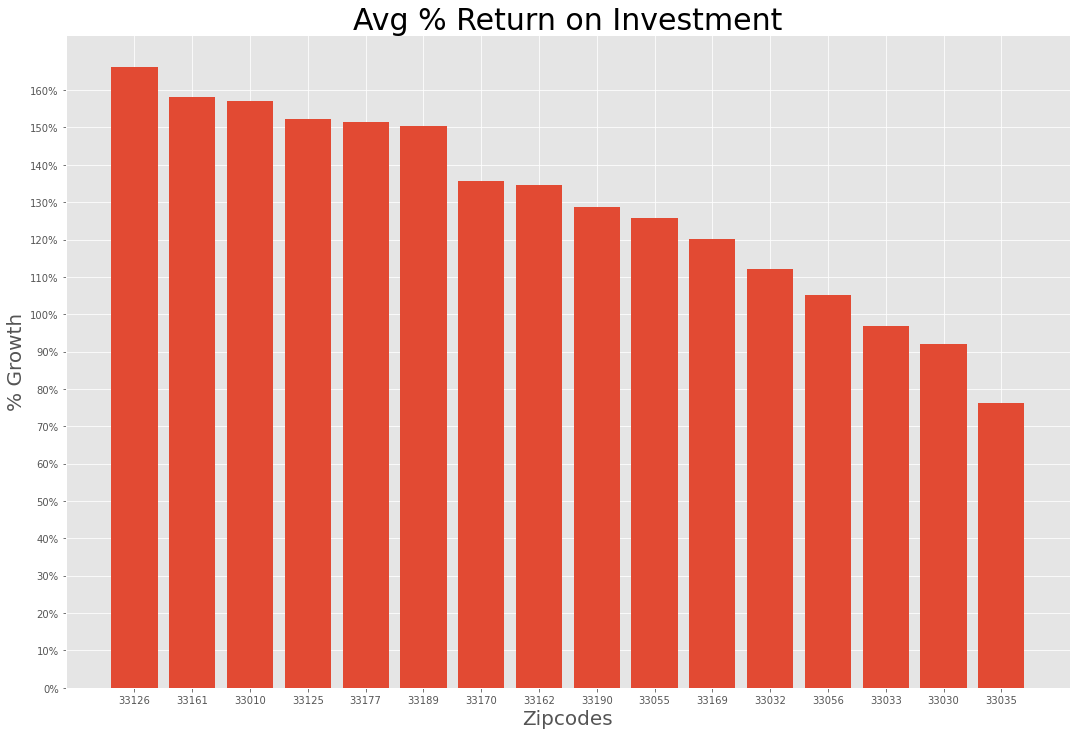

In [11]:
warnings.filterwarnings('ignore')

miami_2011_roi = miami_budget
miami_2011_roi['roi_since11'] = None
miami_2011_roi['roi_since11'] = miami_2011_roi['2018-04'].apply(lambda x : ((x-miami_2011_roi['2011-01'])/(miami_2011_roi['2011-01'])))
miami_2011_roi = miami_2011_roi.sort_values('roi_since11',ascending=False)


fig,ax=plt.subplots(figsize=(18,12))

x_labels = [str(a) for a in miami_2011_roi['RegionName']]
x = list(range(1,17))
y = [a for a in miami_2011_roi['roi_since11']]

ax.bar(x,y)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticks([a/10 for a in list(range(0,17,1))])
ax.set_yticklabels([str(a*10)+'%' for a in list(range(0,17,1))])
ax.set_ylabel('% Growth',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on Investment',fontsize='30');


We can see from the above visual that the highest growing zip code since 2011 is 33126.

## Selecting a ZipCode to build our Time Series model on

We want to build a Time Series model to predict the future ROI for each zip code in Miami-Dade County that would fit our client's budget. But first, we will select one specific zipcode to build our time series model on. For this purpose, we decided to use the highest growing zipcode since 2011.

Therefore, we will run our first Time Series model on the ZipCode- 33126 to predict what its future value will be. Then we can implement a similar workflow on other zipcodes in the County to identify which 5 zipcodes have the highest predicted ROI.

In [12]:
#Dataframe containining historical prices of the 33126 Zip Code.

zip33126 = df[df['RegionName']==33126]

In [13]:
# Time Series dataframe of 33126 Zip Code prices

series33126 = th.melt_data(zip33126)

In [14]:
#Observing our Time Series dataframe

series33126

,value
time,
1996-04-01,108600.0
1996-05-01,108800.0
1996-06-01,109100.0
1996-07-01,109400.0
1996-08-01,109700.0
...,...
2017-12-01,294300.0
2018-01-01,295700.0
2018-02-01,296900.0


We have taken a look at the price history of various zipcodes earlier. Let's now look at the overall average price history of our selected zip-code individually.

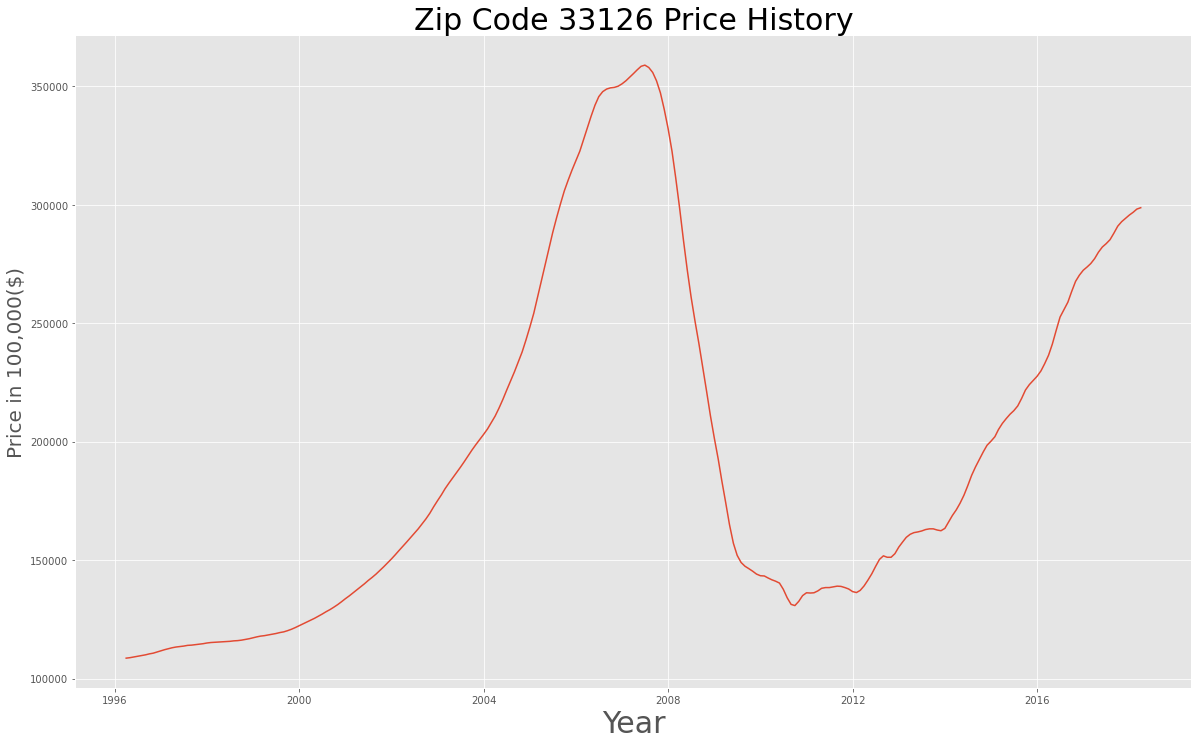

In [15]:
#Visualizing our Time Series Data for zipcode- 33126

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(series33126)

ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Price in 100,000($)',fontsize=20)
ax.set_title('Zip Code 33126 Price History',fontsize=30);

The trend we see above is not greatly dissimilar to all the other zip codes we saw earlier during our earlier data exploration.

## Relevance of Recent Data

We find that market conditions before the 2010s do not necessarily reflect the state of today's market. Therefore we chose to concentrate on modeling our Time Series only based on information from 2011.

In [16]:
recent_series = series33126['2011':]

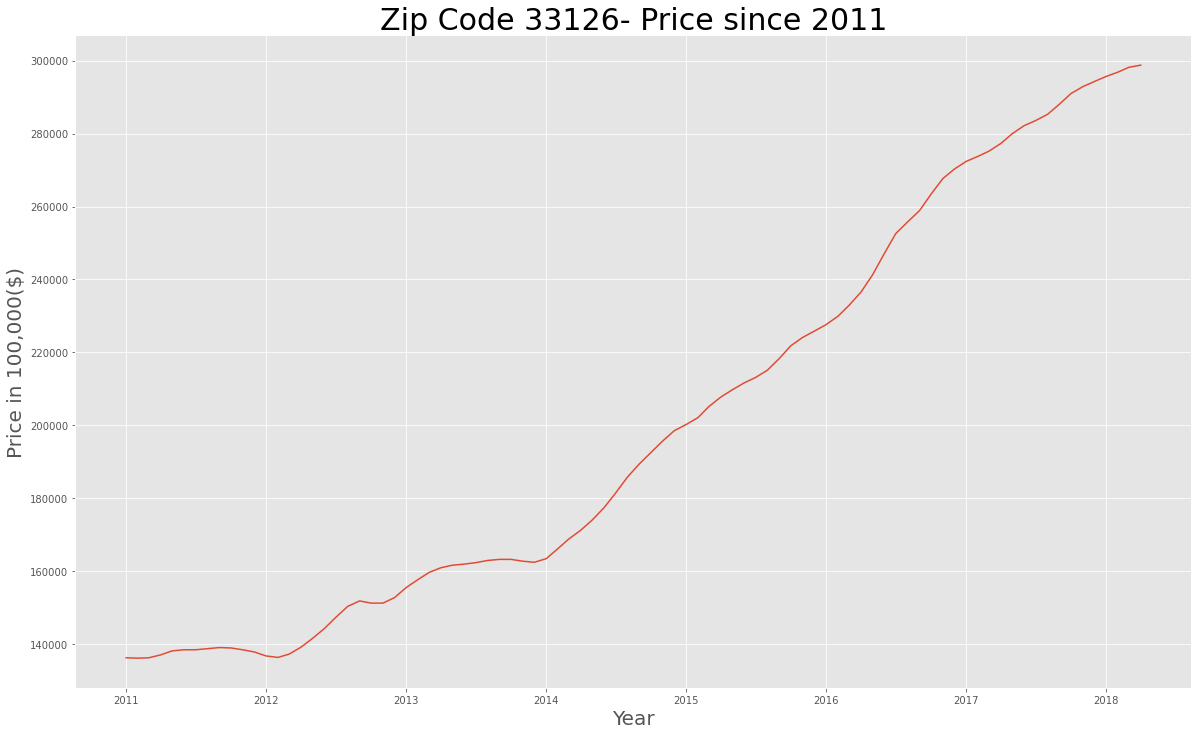

In [17]:
#Visualizing our Time Series Data for zipcode- 33126 from 2011

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(recent_series)

ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Price in 100,000($)',fontsize=20)
ax.set_title('Zip Code 33126- Price since 2011',fontsize=30);

We can now see a positive trend that displays a somewhat linear growth rate in average price.

# Model Training and Testing

Because our model of choice performs the preprocessing step of trend/seasonality removal by itself, we will simply input the raw series into our model.

## Splitting our data into Train and Test

In [12]:
ts_data = df.drop(["RegionID","City","State","SizeRank","Metro","CountyName"],axis=1)
ts_data.set_index("Date",inplace=True)
ts_data

,Zipcode,Price
Date,,
1996-04-01,60657,334200.0
1996-04-01,13624,56400.0
1996-04-01,45335,110050.0
1996-04-01,7755,163700.0
1996-04-01,37681,47200.0
...,...,...
2018-04-01,22556,332700.0
2018-04-01,33761,334500.0
2018-04-01,38242,90900.0


In [13]:
# List of zip codes
zip_codes = [85008, 94590, 94601, 94804, 85035]

# Filter DataFrame based on the given zip codes
ts_data = ts_data[ts_data['Zipcode'].isin(zip_codes)]

# Resample the data to quarterly frequency, taking the mean for each quarter
ts_data = ts_data.resample('M').mean()


In [35]:
from pandas import Timestamp

# Define the start and end dates
start_date = Timestamp('2005-01-01')
end_date = Timestamp('2018-04-01')

# Slice the DataFrame
df_slice = ts_data[(ts_data.index >= start_date) & (ts_data.index <= end_date)]

# splitting the data into train and test
df_slice = df_slice[df_slice["Zipcode"] == 85008]
df_slice.drop("Zipcode",axis=1,inplace=True)

df_slice.index.freq = 'MS'

ts_train = df_slice[:'2015-01']
ts_test = df_slice['2015-02':]

In [67]:
df_slice.head()

,Price
Date,
2005-01-01,147400.0
2005-02-01,150700.0
2005-03-01,154100.0
2005-04-01,157900.0
2005-05-01,161900.0


## Fitting an AUTO-ARIMA Model on our Training Series

We find that finding the optimal p,d & q values and then fitting an ARIMA model can be a time consuming approach especially if we want to iterate this process over multiple zip codes. The benefit of using an AUTO-ARIMA model over an ARIMA model is that it helps eliminate the additional step of finding the optimal combination of p,d & q values and thereby it runs faster than an ARIMA model. The AUTO-ARIMA model performs this step for us and plugs in the p,d & q value combination that returns the lowest AIC score.

In [50]:
# In order for this cell to run, you may need to install pmdarima if you haven't already.
import pmdarima as pm

# using auto arima to find the best p,d,q for our model
model = pm.auto_arima(ts_train, trace=True, error_action='ignore',
                      suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1903.371, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1893.778, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1895.655, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1896.884, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1895.726, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.793 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -945.889
Date:                Wed, 17 Jan 2024   AIC                           1893.778
Time:                        19:26:31   BIC                           1896.557
Sample:                    01-01-2005   HQIC                          1894.906
               

In [51]:
#Identifying the order values for our model
model.order

(0, 2, 0)

In [53]:
#Identifying the Seasonal Order values for our model
model.seasonal_order

(0, 0, 0, 0)

Fitting an ARIMA Model on the training series. The parameters to be used will be gotten from the AUTO ARIMA model above.

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  121
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -945.889
Date:                Wed, 17 Jan 2024   AIC                           1893.778
Time:                        19:27:23   BIC                           1896.557
Sample:                    01-01-2005   HQIC                          1894.906
                         - 01-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.694e+05   4.78e+04      9.818      0.000    3.76e+05    5.63e+05
Ljung-Box (L1) (Q):                   6.39   Jarque-Bera (JB):                 8.22
Prob(Q):                              0.01   Pr

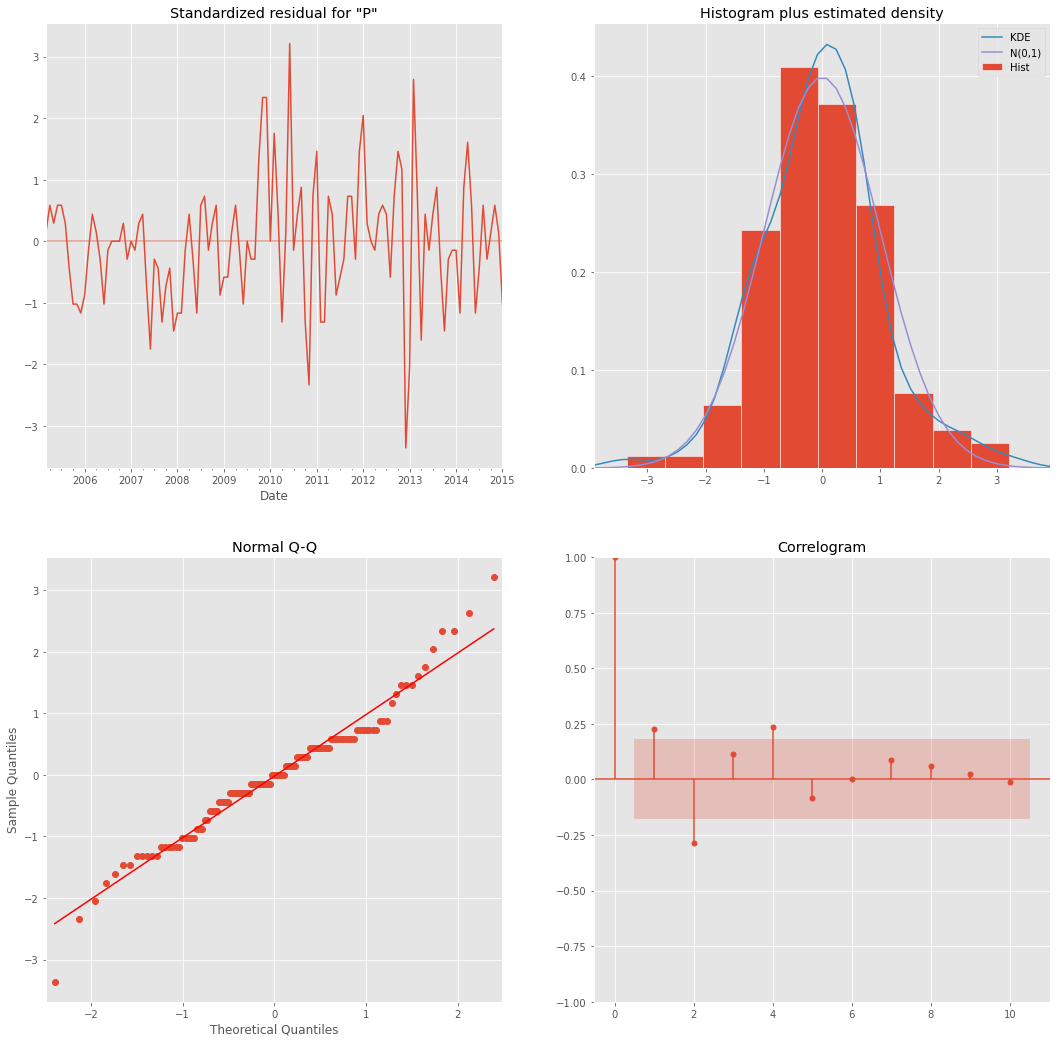

In [56]:
# initializing ARIMA model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(ts_train, order=(0, 2, 0))
# fit the model
ARIMAmodel = ARIMAmodel.fit()

# printing the model summary
print(ARIMAmodel.summary())
ARIMAmodel.plot_diagnostics(figsize=(18, 18))
plt.show()

The residuals should exhibit no correlation and adhere to a normal distribution to meet the assumptions of statistical modeling.

The QQ-plot on the bottom left indicates that the residuals deviate from a perfectly linear trend, suggesting some departure from a strict normal distribution.

The correlogram plot on the bottom left reveals low correlations with lagged versions of the residuals. This observation implies a lack of obvious seasonality in the series.

While the histogram displays a bell curve, indicating a somewhat normal distribution, additional diagnostic tests, such as the Jarque-Bera test and the QQ-plot, suggest there is room for improvement in achieving a perfect normal distribution. Consideration of alternative models or further refinement may enhance the model's reliability.

## Testing our model performance

Let's retrieve our model's predictions for the period between May, 2016 and April 2018; the same period that was used for our test data. We can plot them on the same chart to see how far/close they are from each other.

In [59]:
# Get predictions starting from 04-01-2015 and calculate confidence intervals
# creating a table of the upper and lower limits
pred = ARIMAmodel.get_prediction(start=pd.to_datetime(
    '2015-02-01'), end=pd.to_datetime('2018-04-01'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf.head()

,lower Price,upper Price
2015-02-01,143057.226445,145742.773555
2015-03-01,142997.467053,149002.532947
2015-04-01,142575.801410,152624.198590
2015-05-01,141845.326344,156554.673656
2015-06-01,140841.724794,160758.275206


Now that we have received predictions for our training data, let us plot it against our test data.

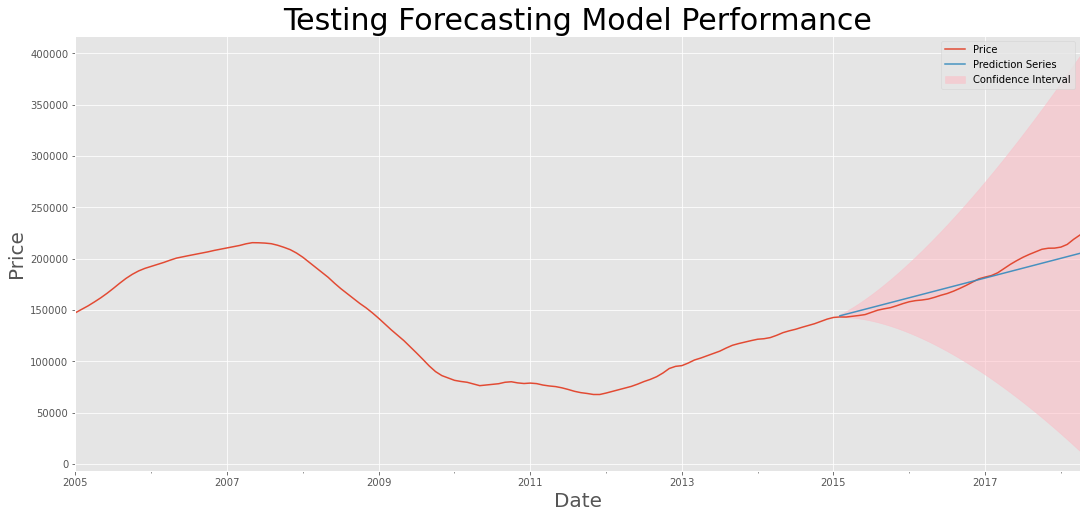

In [60]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = df_slice.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='lightpink', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.set_title('Testing Forecasting Model Performance',fontsize=30)
plt.legend()

plt.show()

Our model was not perfectly accurate but it was able to capture the overall trend that truly occurred between April, 2015 and April 2018. Now that we see that we have a model that can perform well over a 2-3 year period, we can move on to forecast the future until April, 2021- the point at which we will have reached 3 years from the purchase date of April, 2018.

### Model Evaluation


In [63]:
# Getting the rmse for the model
from sklearn.metrics import mean_squared_error as MSE

# Assuming ts_test and pred.predicted_mean are your true and predicted values
RMSE = MSE(ts_test, pred.predicted_mean, squared=False)

# Print the RMSE
print(f"Root Mean Squared Error: {RMSE}")

Root Mean Squared Error: 7664.8214055832495


# Forecasting the Future

In [64]:
# Plug the parameter values from our Auto ARIMA model into a new ARIMA model that fits the entire series.
ARIMA_MODEL = ARIMA(df_slice,
                    order=(0,2,0),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

# Fit the model and print results
full_output = ARIMA_MODEL.fit()

print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  160
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1256.341
Date:                Wed, 17 Jan 2024   AIC                           2514.683
Time:                        19:47:02   BIC                           2517.739
Sample:                    01-01-2005   HQIC                          2515.924
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.224e+05   4.85e+04     10.772      0.000    4.27e+05    6.17e+05
Ljung-Box (L1) (Q):                  10.79   Jarque-Bera (JB):                 7.82
Prob(Q):                              0.00   Pr

In [65]:
# Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower', 'upper', 'prediction']
future_prediction.head()

,lower,upper,prediction
2018-05-01,225783.453478,228616.546522,227200.0
2018-06-01,228232.505684,234567.494316,231400.0
2018-07-01,230299.768242,240900.231758,235600.0
2018-08-01,232041.255162,247558.744838,239800.0
2018-09-01,233494.609827,254505.390173,244000.0


Now that we have our 3 year forecast, let's visualize it to see how far we expect the 33126 zipcode region to grow by April, 2021.

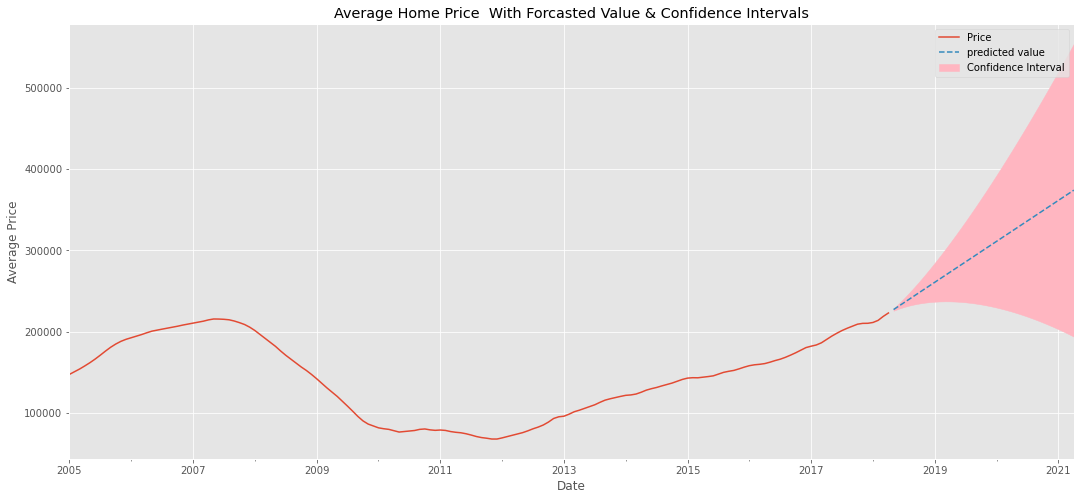

In [66]:
#Plotting our Forecast

fig, ax = plt.subplots()
df_slice.plot(ax=ax,label='Real Values')


future_prediction['prediction'].plot(ax=ax,label='predicted value',ls='--')

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'], 
                y2= future_prediction['upper'],color='lightpink',
                label='Confidence Interval')
ax.legend() 
plt.ylabel("Average Price")
plt.title('Average Home Price  With Forcasted Value & Confidence Intervals')
plt.show()

Having established a workflow for forecasting future prices for one zipcode, we can now plug in this entire process into a loop to attain our expected prices in April, 2021 for the remaining zipcodes in Miami-Dade County that have average prices under our clients' budget.

# Forecasting on every Zip Code in Clark County

In [28]:
zip_predictions = {}

#miami_budget_zips is a list of zipcodes in Miami-Dade County with average price under $300000
for zipcode in miami_budget_zips:
    
    #Melting the time series of our given zipcode
    series = th.melt_data(df[df['RegionName']== zipcode])
    
    #Only taking data from 2011 onwards to more accurately reflect current market conditions
    recent_series = series['2011':]
    
    # Splitting the last 36 months of our series as a test dataset.
    train_series = recent_series[:'2016-04']
    test_series = recent_series['2016-05':]
    
    #Auto ARIMA model
    auto_model = pm.auto_arima(train_series, start_p=0, start_q=0,
                     test='adf',
                     max_p=5, max_q=5,
                     m=1,
                     d=0,
                     seasonal = True,
                     start_P=0,start_Q=0,
                     D=0,
                     trace=True,
                     error_action= 'ignore',
                     suppress_warnings=True,
                     stepwise=True,with_intercept=False)
   
    # Plug the optimal parameter values for our Training data into a SARIMAX model that fits our entire series.
    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(recent_series, 
                                            order= auto_model.order, 
                                            seasonal_order= auto_model.seasonal_order, 
                                            enforce_stationarity=False, 
                                            enforce_invertibility=False)

    # Fit the model and print results
    output = ARIMA_MODEL.fit()

    ## Getting a forecast for the next 36 months after the last absrecorded date on our dataset.
    forecast = output.get_forecast(36)
    prediction = forecast.conf_int()
    prediction['value'] = forecast.predicted_mean
    prediction.columns = ['lower','upper','prediction'] 
    
    #Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[zipcode] = ((prediction['prediction'][-1])
                                - (series['value'][-1]))/ (series['value'][-1])
    

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1707.388, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1666.227, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1660.104, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1661.342, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1038.249, Time=0.39 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=1034.440, Time=0.48 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1664.355, Time=0.08 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=0.53 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=1667.878, Time=0.13 sec
 ARIMA(2,0,5)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 A

 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1647.511, Time=0.08 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=0.46 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0]          
Total fit time: 3.122 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1689.082, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1647.358, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1640.382, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1640.648, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1009.325, Time=0.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.40 

# Recommendations

Having received all our forecasts, lets identify our Top 5 Zipcodes and see how they compare against each other.

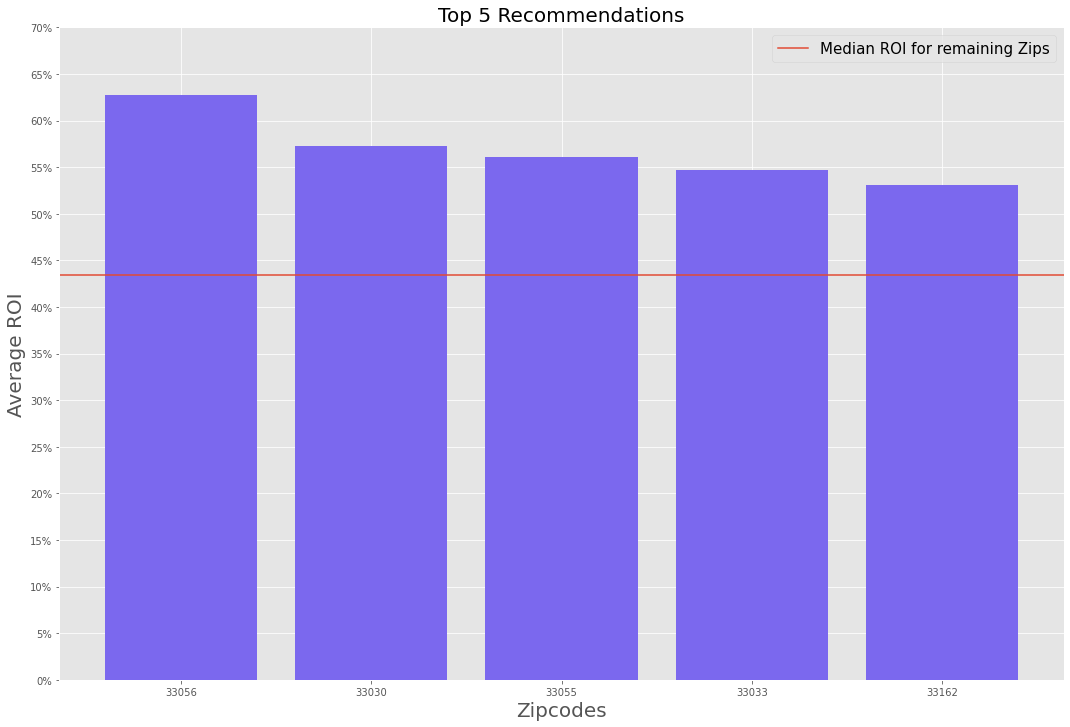

In [29]:
# Sorting our 3 year ROI forecast for zipcodes into descending order
sort_orders = sorted(zip_predictions.items(), key=lambda x: x[1], reverse=True)

sorted_forecast_3yr = {}
for i in sort_orders:
	sorted_forecast_3yr[i[0]] = i[1]

#Selecting only the Top 5 Zips
top_5_zipcodes = list(sorted_forecast_3yr.items())[:5]

fig, ax = plt.subplots(figsize=(18,12))

x_labels = [top_5_zipcodes[0][0],top_5_zipcodes[1][0],top_5_zipcodes[2][0],
            top_5_zipcodes[3][0],top_5_zipcodes[4][0]]
x = [1,2,3,4,5]
y = [top_5_zipcodes[0][1],top_5_zipcodes[1][1],top_5_zipcodes[2][1],
     top_5_zipcodes[3][1],top_5_zipcodes[4][1]]

ax.bar(x, y, color='mediumslateblue')
remaining_zipcodes = list(sorted_forecast_3yr.items())[5:]
median_ROI_other_zips = remaining_zipcodes[5][1]
ax.axhline(y=median_ROI_other_zips,label = 'Median ROI for remaining Zips')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticks([(a/100) for a in list(range(0,75,5))])
ax.set_yticklabels([str(a)+'%' for a in list(range(0,75,5))])
ax.set_title('Top 5 Recommendations', fontsize=20)
ax.set_ylabel('Average ROI', fontsize=20)
ax.set_xlabel('Zipcodes',fontsize=20)
ax.legend(prop={'size': 15});

In [30]:
print(f'The Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[:1][0][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[:1][0][1])*100,2)}%')

The Highest Growing Zipcode: 33056 is expected to grow by 62.75%


We can see from above that our model predicts the zip-code region of 33056 to see the highest growth. But the other 4 of the top 5 zipcodes also have a forecasted ROI with encouraging returns. We can also see that our top 5 recommended zip codes are well above the median 3 year return of the remaining zip codes.

# Conclusion

Based on our work above, we can finally conclude our top 5 recommendations and their expected ROI after 3 years.

In [31]:
print(f'The Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[0][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[0][1])*100,2)}%')
print(f'The Second Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[1][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[1][1])*100,2)}%')
print(f'The Third Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[2][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[2][1])*100,2)}%')
print(f'The Fourth Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[3][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[3][1])*100,2)}%')
print(f'The Fifth Highest Growing Zipcode: {list(sorted_forecast_3yr.items())[4][0]} is expected to grow by {round((list(sorted_forecast_3yr.items())[4][1])*100,2)}%')

The Highest Growing Zipcode: 33056 is expected to grow by 62.75%
The Second Highest Growing Zipcode: 33030 is expected to grow by 57.29%
The Third Highest Growing Zipcode: 33055 is expected to grow by 56.1%
The Fourth Highest Growing Zipcode: 33033 is expected to grow by 54.74%
The Fifth Highest Growing Zipcode: 33162 is expected to grow by 53.07%


After having completed our forecasting analysis, this concludes the scope of our project and therefore we leave the final investment decision on selecting one neighborhood to be made by the client based on their personal preferences. Below is a visualization of where our recommended regions are located. They are circled in red.

In [32]:
recommended_zips = pd.DataFrame([a for a in sorted_forecast_3yr.keys()][:5])
recommended_zips['latitude'] = [25.9595, 25.4803, 25.9446, 25.4921, 25.9261]
recommended_zips['longitude'] = [-80.2433, -80.5272, -80.2823, -80.4367, -80.1819]
recommended_zips.columns = ['ZipCode','Latitude','Longitude']

m = folium.Map(
    location=[25.6516,-80.4327],
    width='75%',
    length='75%',
    zoom_start=9.5
)

for a in list(range(len(recommended_zips))):
    
    folium.Circle(
    radius=4000,
    location=[recommended_zips[['Latitude','Longitude']].iloc[a][0],recommended_zips[['Latitude','Longitude']].iloc[a][1]],
    popup="The Waterfront",
    color="crimson",
    fill=True,
    ).add_to(m);

m